In [6]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install pyglet
plt.style.use('fivethirtyeight')
import seaborn as sns


# What makes a country happy?

Welcome to my first markdown cell! Data used is from here: http://worldhappiness.report/
and now I will **make these words bold** because I just found out how to do so.

In [62]:
h2017 = pd.read_csv("2017.csv")
h2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [63]:
h2016 = pd.read_csv("2016.csv")

In [64]:
h2015 = pd.read_csv("2015.csv")

In [65]:
h2017 = h2017.rename(columns={'Happiness.Rank': 'Rank', 'Happiness.Score': 'Score', 'Economy..GDP.per.Capita.' : 'GDP Per Capita', 'Health..Life.Expectancy.':'Life expectancy', 'Trust..Government.Corruption.': 'Trust'})

In [66]:
h2017 = h2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis = 1)


In [124]:
h2017.head(10)

,Country,Rank,Score,GDP Per Capita,Family,Life expectancy,Freedom,Generosity,Trust,quartile
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,4
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,4
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,4
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,4
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,4
5,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,4
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,4
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,4
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,4
9,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,4


In [72]:
avg_happiness = pd.DataFrame(columns = ["Country", "Avg"])
avg_happiness["Country"] = h2017["Country"]
avg_happiness["Avg"] = [(h2017[h2017["Country"] == country]['Score'].values
                                                                + h2017[h2017["Country"] == country]['Score'].values
                                                                + h2017[h2017["Country"] == country]['Score'].values) / 3
                                                               for country in h2017["Country"]]
# # Remove brackets around values
# avg_happiness["Avg"] = [happiness[0] for happiness in avg_happiness["Avg"]]
# avg_happiness = avg_happiness.sort_values('Avg', ascending = False).truncate(after = 30)
# avg_happiness = avg_happiness.set_index("Country")
# avg_happiness.plot.bar()

Which countries have the highest GDP per capita?

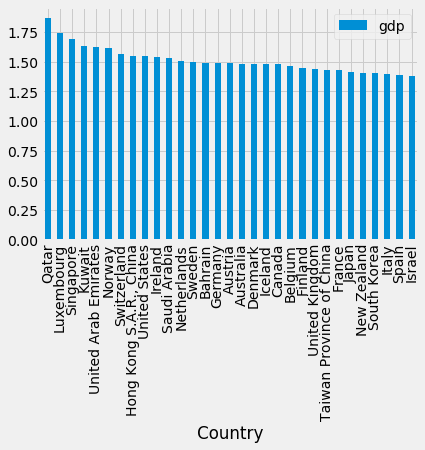

In [79]:
avg_gdp = pd.DataFrame(columns = ["Country", "gdp"])
avg_gdp["Country"] = h2017["Country"]
avg_gdp["gdp"] = [(h2017[h2017["Country"] == country]["GDP Per Capita"].values
                                                                + h2017[h2017["Country"] == country]["GDP Per Capita"].values
                                                                + h2017[h2017["Country"] == country]["GDP Per Capita"].values) / 3
                                                               for country in h2017["Country"]]
# Remove brackets around values
avg_gdp["gdp"] = [gdp[0] for gdp in avg_gdp["gdp"]]
avg_gdp = avg_gdp.sort_values('gdp', ascending = False).reset_index().truncate(after = 30)
avg_gdp.set_index("Country").drop("index", axis = 1).plot.bar()

In [129]:
h2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


Which countries have the highest life expectancy?

In [131]:
# avg_life = pd.DataFrame(columns = ["Country", "Score"])
# avg_life["Country"] = h2017["Country"]
# avg_life["Score"] = [(h2017[h2017["Country"] == country]["Score"].values
#                                                                 + h2016[h2016["Country"] == country]["Happiness Score"].values
#                                                                 + h2015[h2015["Country"] == country]["Happiness Score"].values) / 3
#                                                                for country in h2017["Country"]]
# # Remove brackets around values
# avg_life["Score"] = [gdp[0] for gdp in avg_life["Score"]]
# avg_life = avg_life.sort_values('Score', ascending = False).reset_index().truncate(after = 30).set_index("Country").drop("index", axis = 1)
# avg_life.plot.bar()





In [ ]:
h2017.head(30)

In [134]:
h2017.sort_values(by = "Freedom", ascending = False)

,Country,Rank,Score,GDP Per Capita,Family,Life expectancy,Freedom,Generosity,Trust,quartile
46,Uzbekistan,47,5.971,0.786441,1.548969,0.498273,0.658249,0.415984,0.246528,3
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,4
128,Cambodia,129,4.168,0.601765,1.006238,0.429783,0.633376,0.385923,0.068106,1
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,4
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,4
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,4
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,4
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,4
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,4
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,4


Here I'm messing around with some visualizations.

In [166]:
# sns.swarmplot(x = h2017.sort_values(by = 'Trust', ascending = False)['Country'].head(30), y = h2017.sort_values(by = 'Trust', ascending = False)['Trust'].head(30), data = h2017)
# plt.xticks(rotation = 90)
# plt.show()


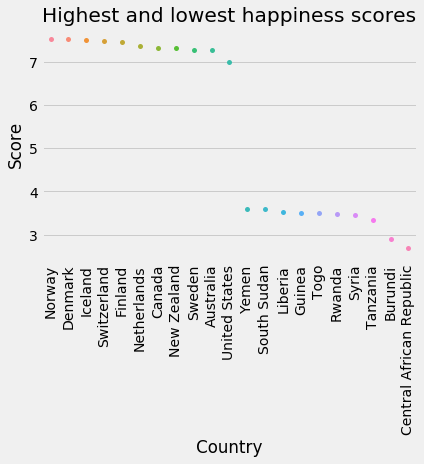

In [174]:
topScore = h2017.nlargest(10, 'Score')
bottomScore = h2017.nsmallest(10, 'Score')
Score = topScore.append(bottomScore)
Score = Score.append(h2017[h2017['Country'] == 'United States'])
sns.swarmplot(x = Score.sort_values(by = 'Score', ascending = False)['Country'], y = Score.sort_values(by = 'Score', ascending = False)['Score'], data = h2017).set_title('Highest and lowest happiness scores')
plt.xticks(rotation = 90)
plt.show()




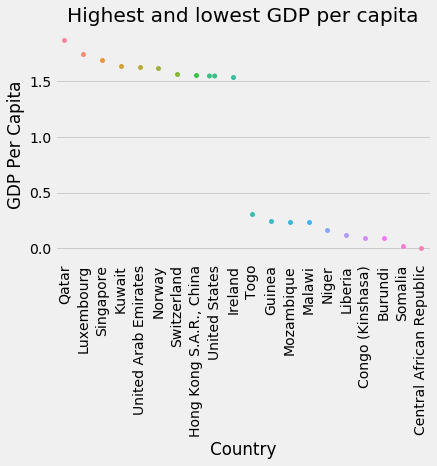

In [175]:
topGDP = h2017.nlargest(10, 'GDP Per Capita')
bottomGDP = h2017.nsmallest(10, 'GDP Per Capita')
GDP = topGDP.append(bottomGDP)
GDP = GDP.append(h2017[h2017['Country'] == 'United States'])
sns.swarmplot(x = GDP.sort_values(by = 'GDP Per Capita', ascending = False)['Country'], y = GDP.sort_values(by = 'GDP Per Capita', ascending = False)['GDP Per Capita'], data = h2017).set_title('Highest and lowest GDP per capita')
plt.xticks(rotation = 90)
plt.show()




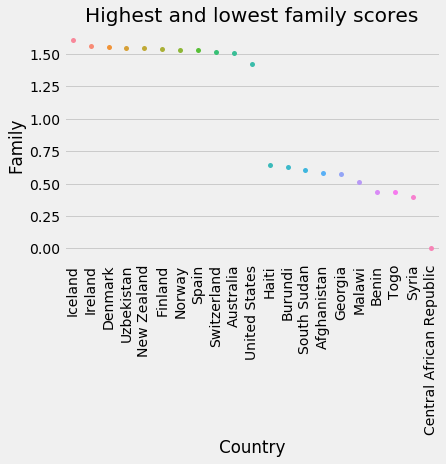

In [179]:
topFamily = h2017.nlargest(10, 'Family')
bottomFamily = h2017.nsmallest(10, 'Family')
Family = topFamily.append(bottomFamily)
Family = Family.append(h2017[h2017['Country'] == 'United States'])
sns.swarmplot(x = Family.sort_values(by = 'Family', ascending = False)['Country'], y = Family.sort_values(by = 'Family', ascending = False)['Family'], data = h2017).set_title('Highest and lowest family scores')
plt.xticks(rotation = 90)
plt.show()




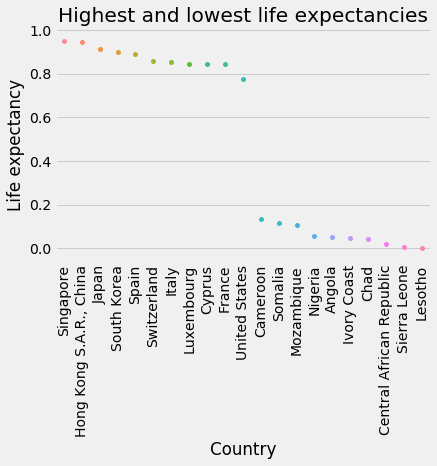

In [176]:
topLE = h2017.nlargest(10, 'Life expectancy')
bottomLE = h2017.nsmallest(10, 'Life expectancy')
LE = topLE.append(bottomLE)
LE = LE.append(h2017[h2017['Country'] == 'United States'])
sns.swarmplot(x = LE.sort_values(by = 'Life expectancy', ascending = False)['Country'], y = LE.sort_values(by = 'Life expectancy', ascending = False)['Life expectancy'].head(30), data = h2017).set_title('Highest and lowest life expectancies')
plt.xticks(rotation = 90)
plt.show()


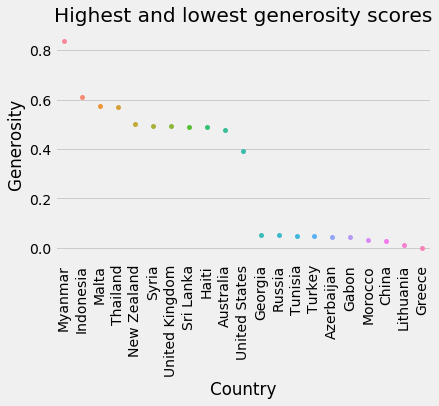

In [177]:
topGenerosity = h2017.nlargest(10, 'Generosity')
bottomGenerosity = h2017.nsmallest(10, 'Generosity')
Generosity = topGenerosity.append(bottomGenerosity)
Generosity = Generosity.append(h2017[h2017['Country'] == 'United States'])
sns.swarmplot(x = Generosity.sort_values(by = 'Generosity', ascending = False)['Country'], y = Generosity.sort_values(by = 'Generosity', ascending = False)['Generosity'].head(30), data = h2017).set_title('Highest and lowest generosity scores')
plt.xticks(rotation = 90)
plt.show()


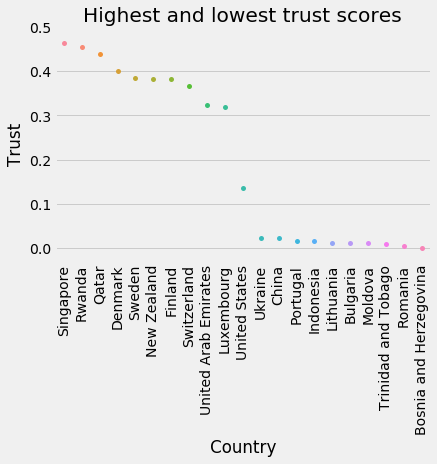

In [178]:
topTrust = h2017.nlargest(10, 'Trust')
bottomTrust = h2017.nsmallest(10, 'Trust')
trust = topTrust.append(bottomTrust)
trust = trust.append(h2017[h2017['Country'] == 'United States'])
sns.swarmplot(x = trust.sort_values(by = 'Trust', ascending = False)['Country'], y = trust.sort_values(by = 'Trust', ascending = False)['Trust'].head(30), data = h2017).set_title('Highest and lowest trust scores')
plt.xticks(rotation = 90)
plt.show()


Maybe we want to see which variables are most heavily correlated with happiness score.

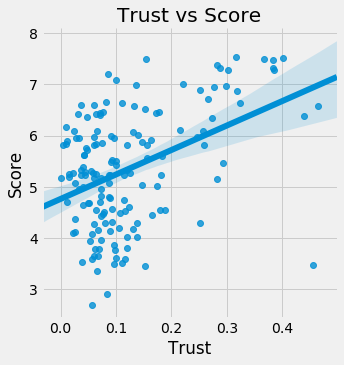

In [192]:
sns.lmplot(x = "Trust", y = 'Score', data = h2017, fit_reg = True)
plt.title('Trust vs Score')

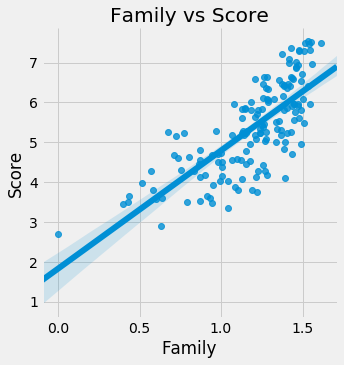

In [189]:
sns.lmplot(x = "Family", y = 'Score', data = h2017, fit_reg = True)
plt.title('Family vs Score')

This is cool, but the legend is way too long.

AttributeError: 'FacetGrid' object has no attribute 'legend_'

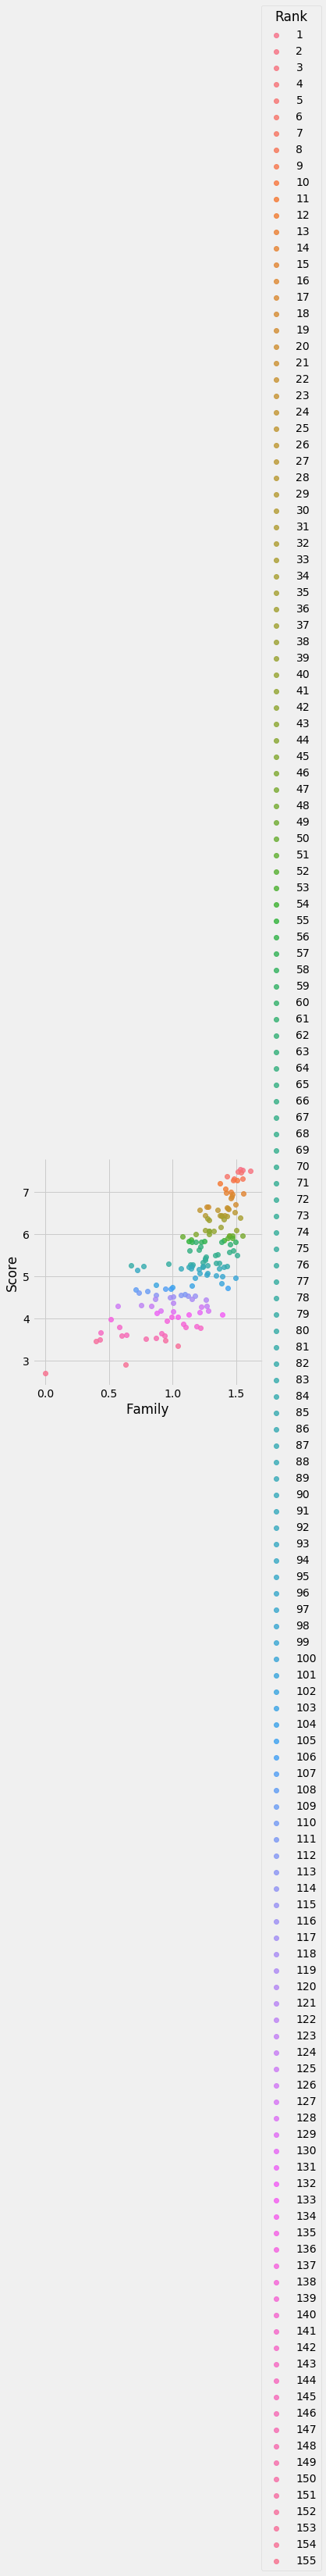

In [94]:
ax = sns.lmplot(x = "Family", y = 'Score', data = h2017, fit_reg = False, hue = "Rank")
ax.legend_.remove()

Let's calculate percentiles for happiness score and try again.

In [97]:
h2017['Score'].describe()

count    155.000000
mean       5.354019
std        1.131230
min        2.693000
25%        4.505500
50%        5.279000
75%        6.101500
max        7.537000
Name: Score, dtype: float64

In [98]:
quartiles = []
for happy in h2017['Score']:
    if happy < 4.505500:
        quartiles.append(1)
    elif happy >= 4.505500 and happy < 5.279000:
        quartiles.append(2)
    elif happy >= 5.279000 and happy < 6.101500:
        quartiles.append(3)
    else:
        quartiles.append(4)
h2017["quartile"] = quartiles

In [16]:
h2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,quartile
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,4
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,4
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,4
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,4
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,4


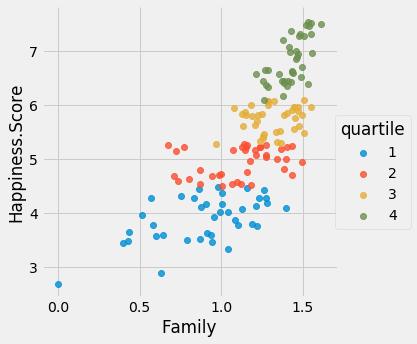

In [17]:
sns.lmplot(x = "Family", y = 'Score', data = h2017, fit_reg = False, hue = "quartile")

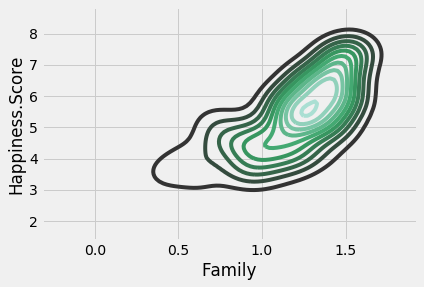

In [18]:
sns.kdeplot(h2017["Family"], h2017[Score])

In [19]:
h2017["Family"].corr(h2017['Score'])

0.7527366726961483

In [99]:
h2017.head()

,Country,Rank,Score,GDP Per Capita,Family,Life expectancy,Freedom,Generosity,Trust,quartile
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,4
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,4
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,4
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,4
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,4


In [114]:
corrs = pd.DataFrame(index = ["GDP Per Capita", "Family", "Life expectancy", "Freedom", "Generosity", "Trust"])

In [115]:
corrs["correlation"] = [h2017[score].corr(h2017['Score']) for score in corrs.index]

In [116]:
corrs

,correlation
GDP Per Capita,0.812469
Family,0.752737
Life expectancy,0.781951
Freedom,0.570137
Generosity,0.155256
Trust,0.429080


Here we can examine each factor's correlation with the overall happiness score for the year 2017. Clearly, economy is the most determining factor. I, personally, was most surprised by how low-ranking government-corruption was. (font will not be comic sans in my final draft) 

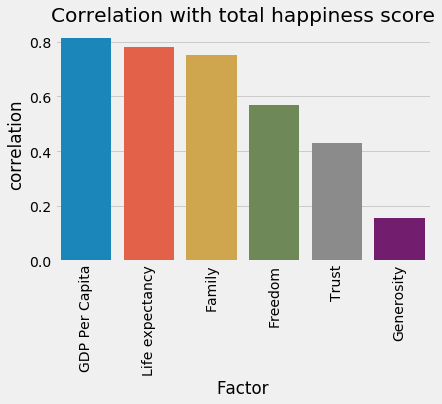

In [117]:
corrs = corrs.sort_values("correlation", ascending = False)
sns.barplot(x = corrs.index, y = 'correlation', data = corrs)
csfont = {'fontname':'Comic Sans MS'}
plt.title('Correlation with total happiness score')
plt.xlabel('Factor')
plt.xticks(rotation = 90)
plt.show()

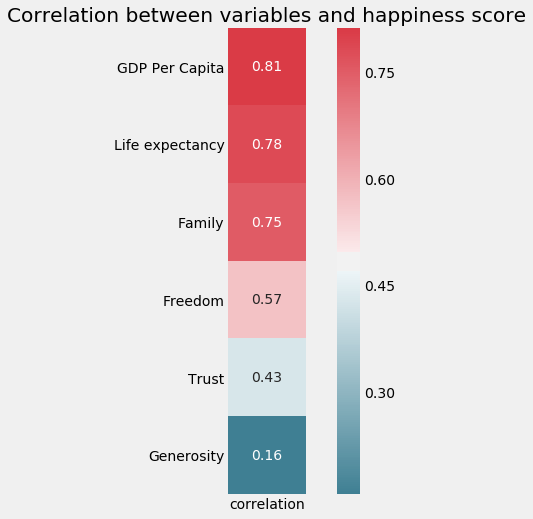

In [186]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrs, annot=True, mask=np.zeros_like(corrs, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax).set_title('Correlation between variables and happiness score')

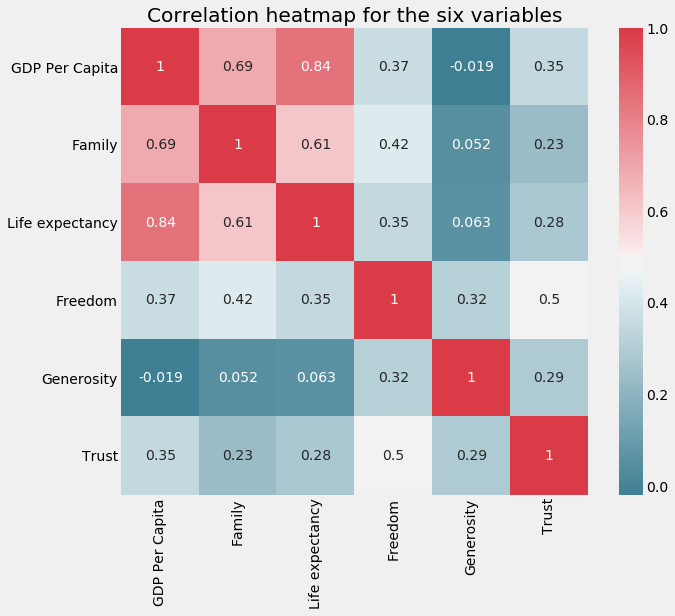

In [184]:
f, ax = plt.subplots(figsize=(10, 8))
corr = h2017.drop(['Rank', 'Score', 'quartile'], axis = 1).corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax).set_title('Correlation heatmap for the six variables')

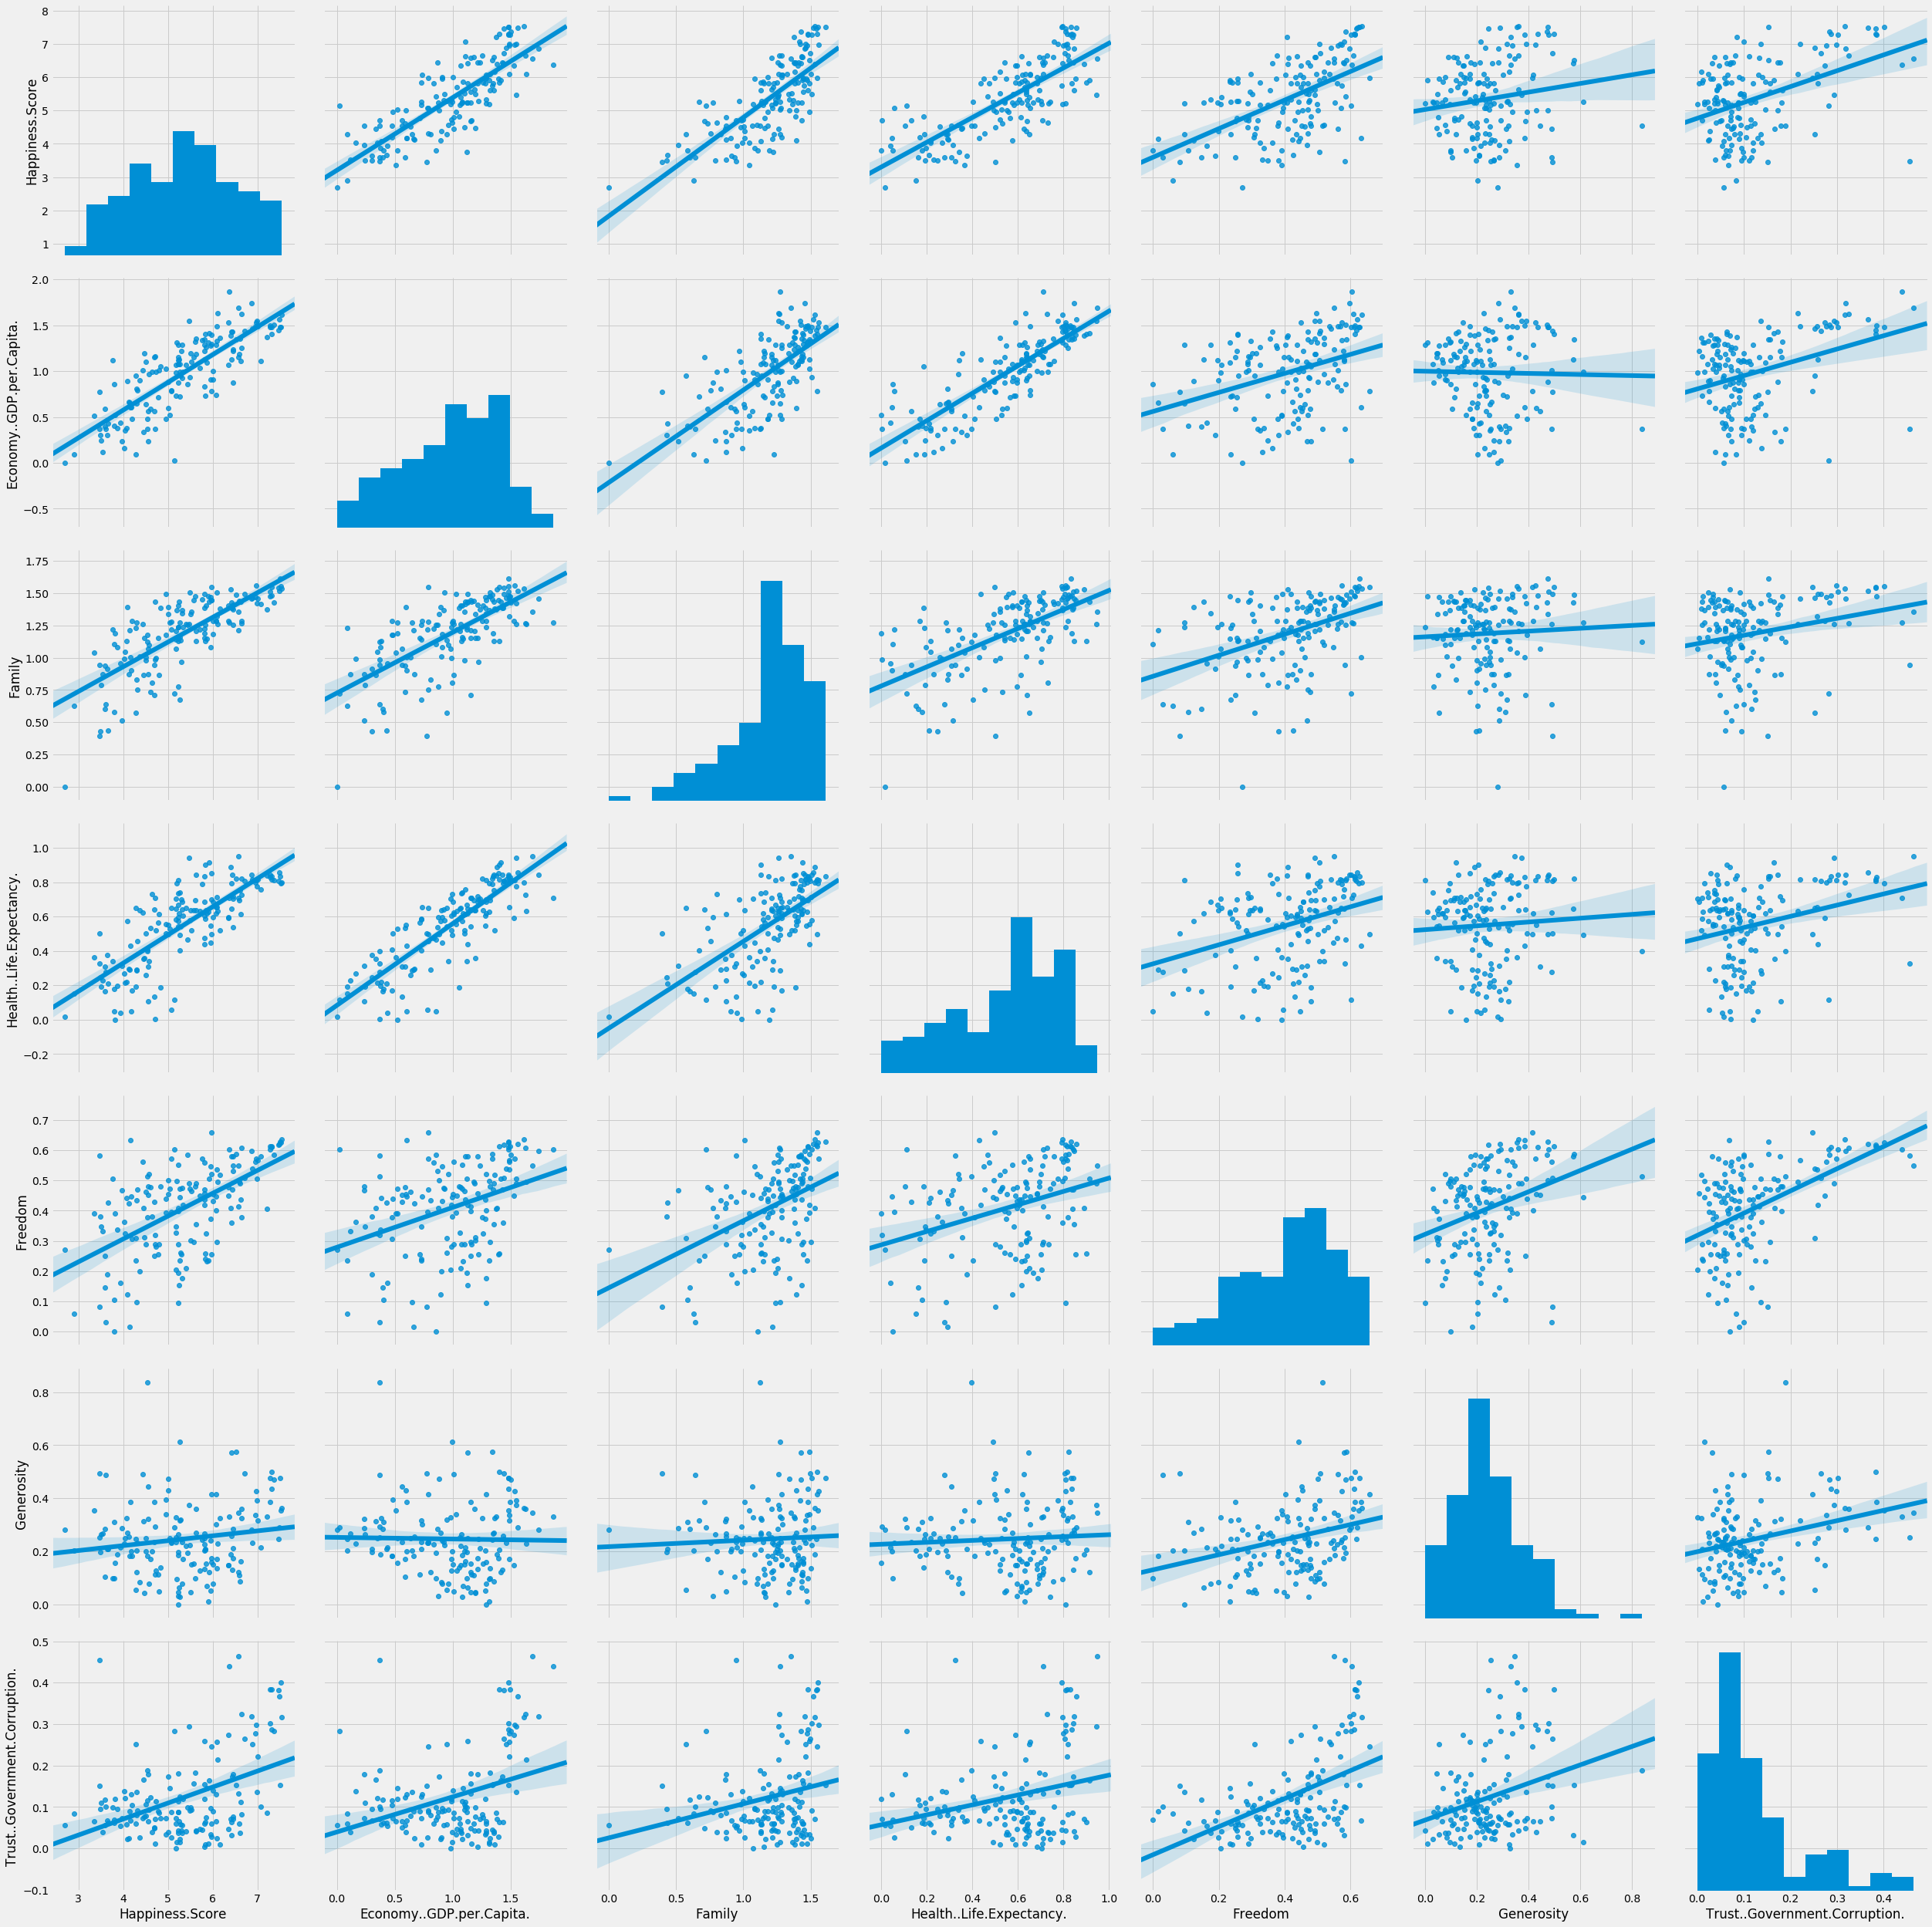

In [51]:
sns.pairplot(h2017, vars = [Score, Economy", "Family", "Health..Life.Expectancy.", "Freedom", "Generosity", "Trust..Government.Corruption." ], kind = "reg", size = 5)
# sns.plt.show()


In [196]:
corrs = corrs.rename({'correlation' : 'correlation coefficient'})
corrs.head()

,correlation
GDP Per Capita,0.812469
Life expectancy,0.781951
Family,0.752737
Freedom,0.570137
Trust,0.429080
